In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as smimp
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
wine_data = pd.read_csv("winequalityN.csv")


In [4]:
# Select the three variables of interest
selected_columns = ['alcohol', 'fixed acidity', 'pH']

# Calculate descriptive statistics for the selected variables
descriptive_stats = wine_data[selected_columns].describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
           alcohol  fixed acidity           pH
count  6497.000000    6487.000000  6488.000000
mean     10.491801       7.216579     3.218395
std       1.192712       1.296750     0.160748
min       8.000000       3.800000     2.720000
25%       9.500000       6.400000     3.110000
50%      10.300000       7.000000     3.210000
75%      11.300000       7.700000     3.320000
max      14.900000      15.900000     4.010000


In [7]:
wine_data[selected_columns].isnull().sum()

alcohol           0
fixed acidity    10
pH                9
dtype: int64

In [8]:
# Fill missing values in the selected columns with the mean of each column
wine_data['fixed acidity'].fillna(wine_data['fixed acidity'].mean(), inplace=True)
wine_data['pH'].fillna(wine_data['pH'].mean(), inplace=True)

# Verify that there are no more missing values
missing_values_after_fill = wine_data[selected_columns].isnull().sum()
print("Missing values after filling:")
print(missing_values_after_fill)


Missing values after filling:
alcohol          0
fixed acidity    0
pH               0
dtype: int64


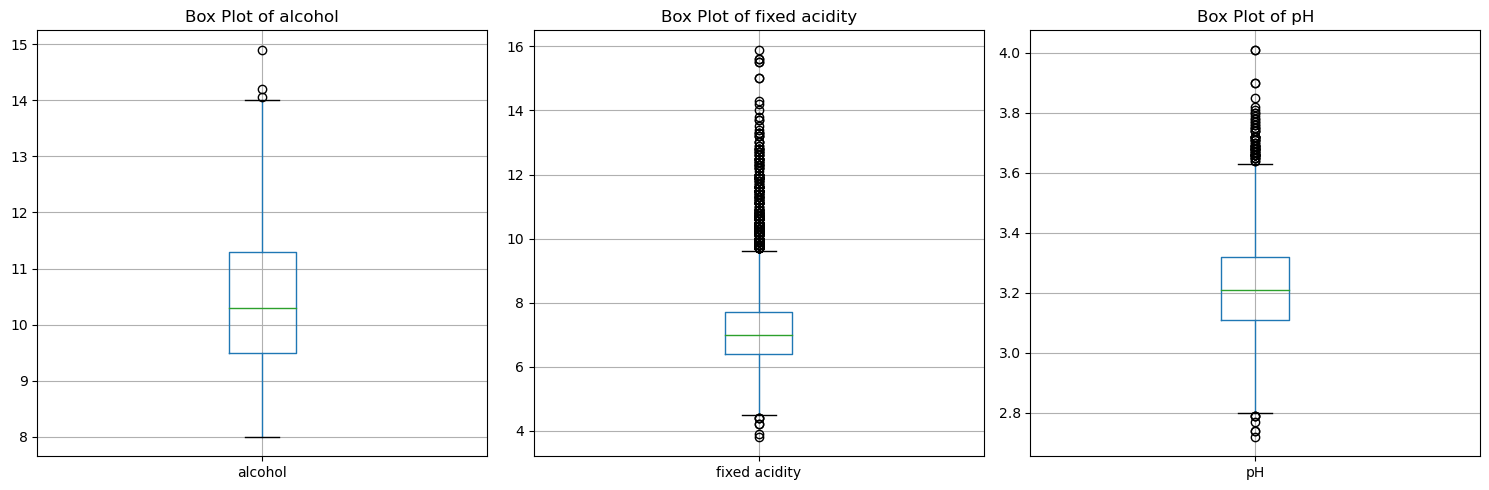

In [9]:

# Generate box plots to visualize distributions and identify outliers
plt.figure(figsize=(15, 5))

for i, col in enumerate(selected_columns):
    plt.subplot(1, 3, i + 1)
    wine_data.boxplot(column=col)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [10]:
# Handling outliers (Example: removing outliers beyond 1.5 * IQR)
for col in selected_columns:
    Q1 = wine_data[col].quantile(0.25)
    Q3 = wine_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    wine_data = wine_data[(wine_data[col] >= lower_bound) & (wine_data[col] <= upper_bound)]

# Verify that outliers are handled
print("Data after handling outliers:")
print(wine_data[selected_columns].describe())

Data after handling outliers:
           alcohol  fixed acidity           pH
count  6087.000000    6087.000000  6087.000000
mean     10.482818       7.014427     3.217680
std       1.194658       0.895437     0.154809
min       8.000000       4.500000     2.790000
25%       9.500000       6.400000     3.110000
50%      10.300000       6.900000     3.210000
75%      11.300000       7.500000     3.320000
max      14.000000       9.600000     3.660000


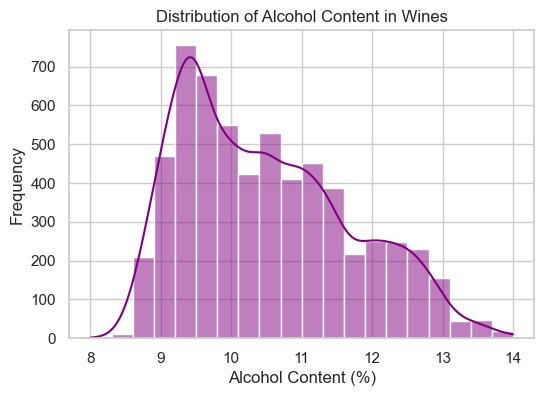

In [16]:
# Set up the aesthetics
sns.set(style="whitegrid")

# 1. Histogram of Alcohol Content
plt.figure(figsize=(6, 4))
sns.histplot(wine_data['alcohol'], bins=20, kde=True, color='purple')
plt.title('Distribution of Alcohol Content in Wines')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Frequency')
plt.show()

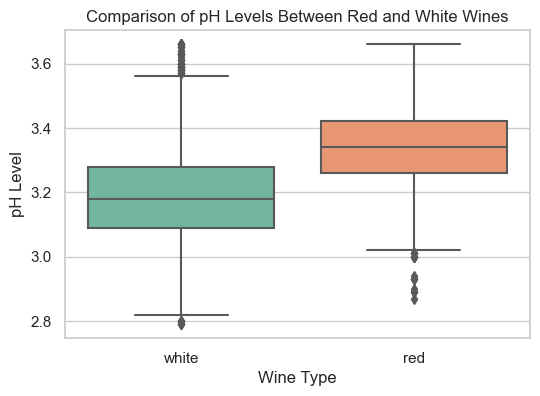

In [15]:
# 2. Box Plot of pH Levels for Red and White Wines
plt.figure(figsize=(6, 4))
sns.boxplot(x='type', y='pH', data=wine_data, palette="Set2")
plt.title('Comparison of pH Levels Between Red and White Wines')
plt.xlabel('Wine Type')
plt.ylabel('pH Level')
plt.show()

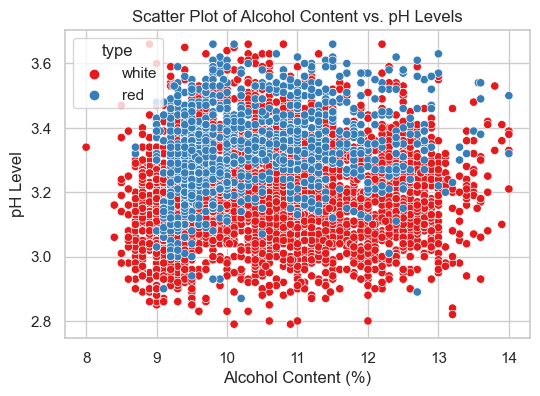

In [17]:
# 3. Scatter Plot of Alcohol Content vs. pH Levels
plt.figure(figsize=(6, 4))
sns.scatterplot(x='alcohol', y='pH', hue='type', data=wine_data, palette="Set1")
plt.title('Scatter Plot of Alcohol Content vs. pH Levels')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('pH Level')
plt.show()

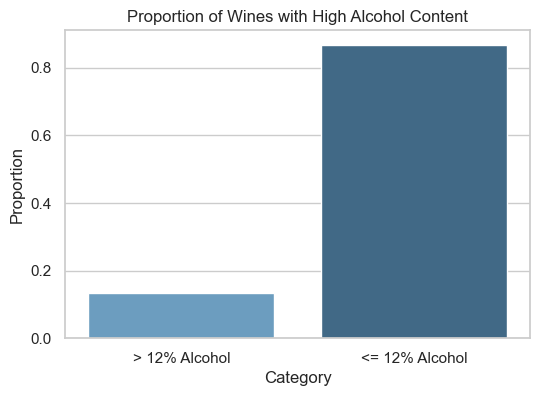

In [20]:
# 4. Bar Plot of Proportion of Wines with High Alcohol Content
high_alcohol_count = wine_data['alcohol'] > 12
proportion_high_alcohol = np.mean(high_alcohol_count)
proportion_data = pd.DataFrame({
    'Category': ['> 12% Alcohol', '<= 12% Alcohol'],
    'Proportion': [proportion_high_alcohol, 1 - proportion_high_alcohol]
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='Proportion', data=proportion_data, palette="Blues_d")
plt.title('Proportion of Wines with High Alcohol Content')
plt.ylabel('Proportion')
plt.show()


Descriptive Statistics: The describe() function provides an overview of the central tendency, dispersion, and shape of the dataset's distribution for the selected variables.
Box Plots: The box plots are generated to visualize the distribution and detect outliers in each selected variable.
Handling Outliers: The code snippet includes an example of how to remove outliers using the Interquartile Range (IQR) method. This method defines outliers as any values beyond 1.5 times the IQR from the first and third quartiles.

In [24]:

# הגדרת ערכי ההשערות לכל משתנה
hypothesized_values = {
    'alcohol': 10,       # ממוצע משוער לתכולת אלכוהול
    'fixed acidity': 7,  # ממוצע משוער לחומציות קבועה
    'pH': 3.3            # ממוצע משוער לרמת pH
}

# שליפת נתונים ללא ערכי חסר עבור כל משתנה
alcohol_data = wine_data['alcohol'].dropna()
fixed_acidity_data = wine_data['fixed acidity'].dropna()
pH_data = wine_data['pH'].dropna()

# בדיקת השערה עבור תכולת אלכוהול - בדיקה חד-צדדית ימנית
t_stat_alcohol, p_value_alcohol = ttest_1samp(alcohol_data, hypothesized_values['alcohol'])
# תיקון לערך p לבדיקה חד-צדדית ימנית
p_value_alcohol /= 2

# בדיקת השערה עבור חומציות קבועה - בדיקה חד-צדדית שמאלית
t_stat_fixed_acidity, p_value_fixed_acidity = ttest_1samp(fixed_acidity_data, hypothesized_values['fixed acidity'])
# תיקון לערך p לבדיקה חד-צדדית שמאלית
p_value_fixed_acidity /= 2

# בדיקת השערה עבור רמת pH - בדיקה דו-צדדית
t_stat_pH, p_value_pH = ttest_1samp(pH_data, hypothesized_values['pH'])

# הצגת התוצאות
results = {
    'משתנה': ['תכולת אלכוהול', 'חומציות קבועה', 'pH'],
    'סטטיסטיקת T': [t_stat_alcohol, t_stat_fixed_acidity, t_stat_pH],
    'ערך P': [p_value_alcohol, p_value_fixed_acidity, p_value_pH],
    'סוג בדיקה': ['ימנית', 'שמאלית', 'דו-צדדית']
}

results_df = pd.DataFrame(results)
print(results_df)


           משתנה  סטטיסטיקת T          ערך P סוג בדיקה
0  תכולת אלכוהול    31.531268  1.459684e-202     ימנית
1  חומציות קבועה     1.257003   1.044005e-01    שמאלית
2             pH   -41.487222   0.000000e+00  דו-צדדית


In [28]:
# Hypothesized variance
hypothesized_variance = 0.02  # Example variance

# Random sample of pH data
ph_sample = wine_data['pH'].dropna().sample(n=100, random_state=42)

# Perform variance test (chi-square test for variance)
sample_variance = np.var(ph_sample, ddof=1)
sample_size = len(ph_sample)
chi_square_stat = (sample_size - 1) * sample_variance / hypothesized_variance
p_value_variance = stats.chi2.sf(chi_square_stat, df=sample_size - 1)

# Output the results
print(f"Chi-square statistic: {chi_square_stat}")
print(f"P-value for variance test: {p_value_variance}")

if p_value_variance < 0.05:
    print("Reject the null hypothesis: The variance of pH differs from the hypothesized value.")
else:
    print("Fail to reject the null hypothesis: The variance of pH does not differ from the hypothesized value.")


Chi-square statistic: 128.39454999999995
P-value for variance test: 0.025096103191635362
Reject the null hypothesis: The variance of pH differs from the hypothesized value.


In [34]:
import numpy as np
import statsmodels.api as sm

# Discretize alcohol content
high_alcohol = wine_data['alcohol'] > 12
prop_hypothesis = 0.30  # Hypothesized proportion
count = np.sum(high_alcohol)
nobs = len(high_alcohol)

# Perform proportion z-test using statsmodels
prop_z_stat, prop_p_value = sm.stats.proportions_ztest(count=count, nobs=nobs, value=prop_hypothesis)

# Output the results
print(f"Z-statistic: {prop_z_stat}")
print(f"P-value for proportion test: {prop_p_value}")

if prop_p_value < 0.05:
    print("Reject the null hypothesis: The proportion of wines with high alcohol content differs from 30%.")
else:
    print("Fail to reject the null hypothesis: The proportion of wines with high alcohol content does not differ from 30%.")


Z-statistic: -38.44952027081045
P-value for proportion test: 0.0
Reject the null hypothesis: The proportion of wines with high alcohol content differs from 30%.


In [31]:
# Split data into red and white wines
red_wine = wine_data[wine_data['type'] == 'red']['pH'].dropna()
white_wine = wine_data[wine_data['type'] == 'white']['pH'].dropna()

# Perform independent t-test
t_stat_means, p_value_means = stats.ttest_ind(red_wine, white_wine)

# Output the results
print(f"T-statistic: {t_stat_means}")
print(f"P-value for equality of means: {p_value_means}")

if p_value_means < 0.05:
    print("Reject the null hypothesis: The mean pH levels between red and white wines are different.")
else:
    print("Fail to reject the null hypothesis: The mean pH levels between red and white wines are not different.")


T-statistic: 33.861627056843936
P-value for equality of means: 2.248585480177568e-230
Reject the null hypothesis: The mean pH levels between red and white wines are different.


In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import norm, chi2
# Extract 'pH' data without missing values
pH_data = wine_data['pH'].dropna()

# Define bins and categorize the data
bins = np.histogram_bin_edges(pH_data, bins='auto')  # Automatically determine the best bin edges
observed_freq, _ = np.histogram(pH_data, bins=bins)  # Calculate the observed frequencies

# Calculate expected frequencies assuming a normal distribution
expected_freq = len(pH_data) * np.diff(norm.cdf(bins, loc=pH_data.mean(), scale=pH_data.std()))

# Perform the Chi-square goodness-of-fit test
chi_square_stat = ((observed_freq - expected_freq) ** 2 / expected_freq).sum()
p_value_chi = chi2.sf(chi_square_stat, df=len(observed_freq) - 1)  # degrees of freedom = number of bins - 1

# Display the results
print(f"Chi-square statistic: {chi_square_stat}")
print(f"P-value for goodness-of-fit test: {p_value_chi}")

if p_value_chi < 0.05:
    print("Reject the null hypothesis: The pH levels do not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: The pH levels follow a normal distribution.")


Chi-square statistic: 340.42283484272895
P-value for goodness-of-fit test: 9.806849999182987e-51
Reject the null hypothesis: The pH levels do not follow a normal distribution.


In [32]:
# Perform goodness-of-fit test (Kolmogorov-Smirnov test)
ks_stat, p_value_ks = stats.kstest(wine_data['pH'].dropna(), 'norm', args=(wine_data['pH'].mean(), wine_data['pH'].std()))

# Output the results
print(f"KS statistic: {ks_stat}")
print(f"P-value for goodness-of-fit test: {p_value_ks}")

if p_value_ks < 0.05:
    print("Reject the null hypothesis: The pH levels do not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: The pH levels follow a normal distribution.")


KS statistic: 0.03727187097934559
P-value for goodness-of-fit test: 9.203481128769774e-08
Reject the null hypothesis: The pH levels do not follow a normal distribution.


In [33]:
# Discretize variables
alcohol_discrete = pd.qcut(wine_data['alcohol'], q=4, labels=False)
ph_discrete = pd.qcut(wine_data['pH'], q=4, labels=False)

# Create a contingency table
contingency_table = pd.crosstab(alcohol_discrete, ph_discrete)

# Perform Chi-square test for independence
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value for Chi-square test: {p_value_chi2}")

if p_value_chi2 < 0.05:
    print("Reject the null hypothesis: The variables alcohol and pH are dependent.")
else:
    print("Fail to reject the null hypothesis: The variables alcohol and pH are independent.")


Chi-square statistic: 249.14309543073546
P-value for Chi-square test: 1.513076137560469e-48
Reject the null hypothesis: The variables alcohol and pH are dependent.
